# Sales Analysis

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### Merging 12 Months Data

In [2]:
files = [file for file in os.listdir('Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

### Read and Cleaning Updated Data Frame

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
#Cleaning Null Rows

all_data = all_data.dropna()

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [8]:
#Number column still read as object, means there are non null data need to be cleaning
#Check if the are any rows containing header data

all_data.loc[all_data['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
#Deleting all rows that contain header string

all_data = all_data.loc[all_data['Order ID'] != 'Order ID']

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [11]:
#Change Data Type to Selected Columns
all_data[['Order ID','Quantity Ordered']] = all_data[['Order ID','Quantity Ordered']].astype('int')

all_data['Price Each'] = all_data['Price Each'].astype('float')

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int32  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int32(2), object(3)
memory usage: 8.5+ MB


In [13]:
#Reindexing 
all_data.index = range(len(all_data))

In [14]:
all_data.info()
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int32  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int32(2), object(3)
memory usage: 7.1+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment Data With Additionnal Columns

##### Add Month Column

In [15]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add Sales Column

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add City Column

In [22]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : f'{get_city(x)} ({get_state(x)})')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Analysis

##### Question 1 : What was the best month for sales? How much was earned the month?

In [23]:
all_data.groupby('Month').sum().sort_values(by='Sales', ascending=False)

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
12,7.685905e+09,28114,4588415.41,4613443.34
10,5.457110e+09,22703,3715554.83,3736726.88
4,3.387347e+09,20558,3367671.02,3390670.24
11,5.047203e+09,19798,3180600.68,3199603.20
5,3.345872e+09,18667,3135125.13,3152606.75
3,2.564811e+09,17005,2791207.83,2807100.38
7,3.284140e+09,16072,2632539.56,2647775.76
6,2.932976e+09,15253,2562025.61,2577802.26
8,2.899374e+09,13448,2230345.42,2244467.88


##### Answer 1 : Month 12th (December)

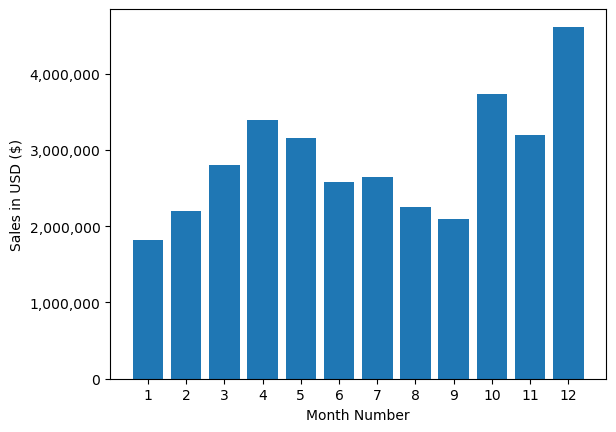

In [24]:
tot_sales = all_data.groupby('Month').sum()

months = range(1,13)

plt.bar(months, tot_sales['Sales'])

plt.xticks(months) #x axis make 1 to 12
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #Turn off scientific notation when numbers are large

plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')

plt.show()

##### Question 2 : What city had the highest number of sales?

In [34]:
all_data.groupby('City').sum().sort_values(by="Sales", ascending=False)

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
San Francisco (CA),1.030444e+10,50239,8211461.74,315520,8262203.91
Los Angeles (CA),6.811085e+09,33289,5421435.23,208325,5452570.80
New York City (NY),5.736334e+09,27932,4635370.83,175741,4664317.43
Boston (MA),4.598265e+09,22528,3637409.77,141112,3661642.01
Atlanta (GA),3.423838e+09,16602,2779908.20,104794,2795498.58
Dallas (TX),3.415644e+09,16730,2752627.82,104620,2767975.40
Seattle (WA),3.406694e+09,16553,2733296.01,104941,2747755.48
Portland (OR),2.305595e+09,11303,1860558.22,70621,1870732.34
Austin (TX),2.280982e+09,11153,1809873.61,69829,1819581.75


##### Answer 2 : San Fransisco (CA)

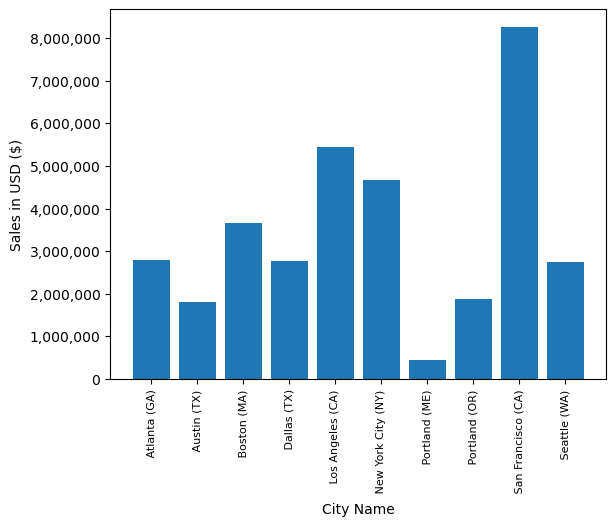

In [51]:
tot_sales = all_data.groupby('City').sum()

cities = [city for city, x in all_data.groupby('City')] #to sort data city same as y data sort

plt.bar(cities, tot_sales['Sales'])

plt.xticks(cities, rotation='vertical', size=8) 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #Turn off scientific notation when numbers are large

plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')

plt.show()

##### Question 3 : What time should we display advertisements to maximize likelihood of costumer's buying product?

In [55]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #Convert data type to date time

In [61]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


##### Answer 3 : Peak of sales happened in 12am (12:00) and 7pm (19:00), recommendation sales effective time is from 9am (9:00) to 10pm (22:00)

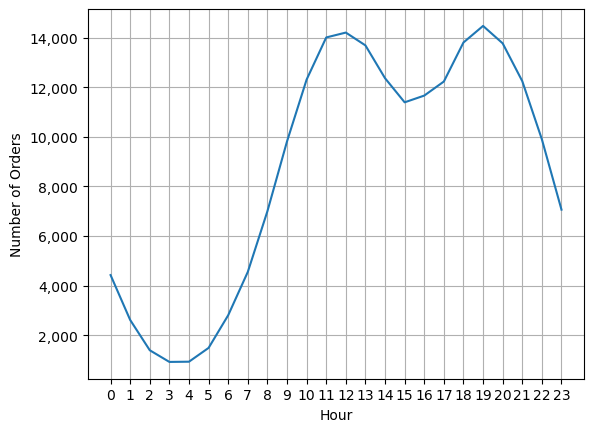

In [80]:
hours = [hour for hour, x in all_data.groupby('Hour')]

#Using line chart instead of bar chart

plt.plot(hours, all_data.groupby('Hour').sum()['Quantity Ordered'])
plt.xticks(hours)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #To add separator comma in thosands
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

plt.show()

In [69]:
all_data.groupby(['Hour']).sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,,
0,9.009579e+08,4428,709296.70,27554,713721.27,103596
1,5.432331e+08,2619,458490.00,16657,460866.88,61807
2,2.824069e+08,1398,233833.64,8507,234851.44,32508
3,1.922044e+08,928,144726.42,5904,145757.89,23044
4,1.992037e+08,937,162058.18,6148,162661.01,26876
5,3.044691e+08,1493,229621.21,9301,230679.82,42877
6,5.721289e+08,2810,445000.11,17539,448113.00,80343
7,9.320453e+08,4556,740568.11,28850,744854.12,127447
8,1.434065e+09,7002,1185970.62,43626,1192348.97,198135


##### Question 4 : What products are most often sold together?

In [190]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [213]:
#find duplicated order id to check which product ordered together

df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))

df = df[['Order ID','Grouped Products']].drop_duplicates()

df.head(20)

,Order ID,Grouped Products
2,176560,"Google Phone , Wired Headphones"
17,176574,"Google Phone , USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones , Bose SoundSport H..."
31,176586,"AAA Batteries (4-pack) , Google Phone"
118,176672,"Lightning Charging Cable , USB-C Charging Cable"
128,176681,"Apple Airpods Headphones , ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones , AAA Batteries (4-..."
188,176739,"34in Ultrawide Monitor , Google Phone"
224,176774,"Lightning Charging Cable , USB-C Charging Cable"
232,176781,"iPhone , Lightning Charging Cable"


In [234]:
# Import other necessary libraries
from itertools import combinations
from collections import Counter

count = Counter()

#Counting most pairing product in selected chosen number of pairing

for row in df['Grouped Products']:
    row_list = row.split(' , ')
    count.update(Counter(combinations(row_list, 2))) #2 way of pairing, can be 3 or 4  any chosen number
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Answer 4 : Iphone and Lightning Charging Cable are the most being sold together

Text(0, 0.5, 'Quantity of Order')

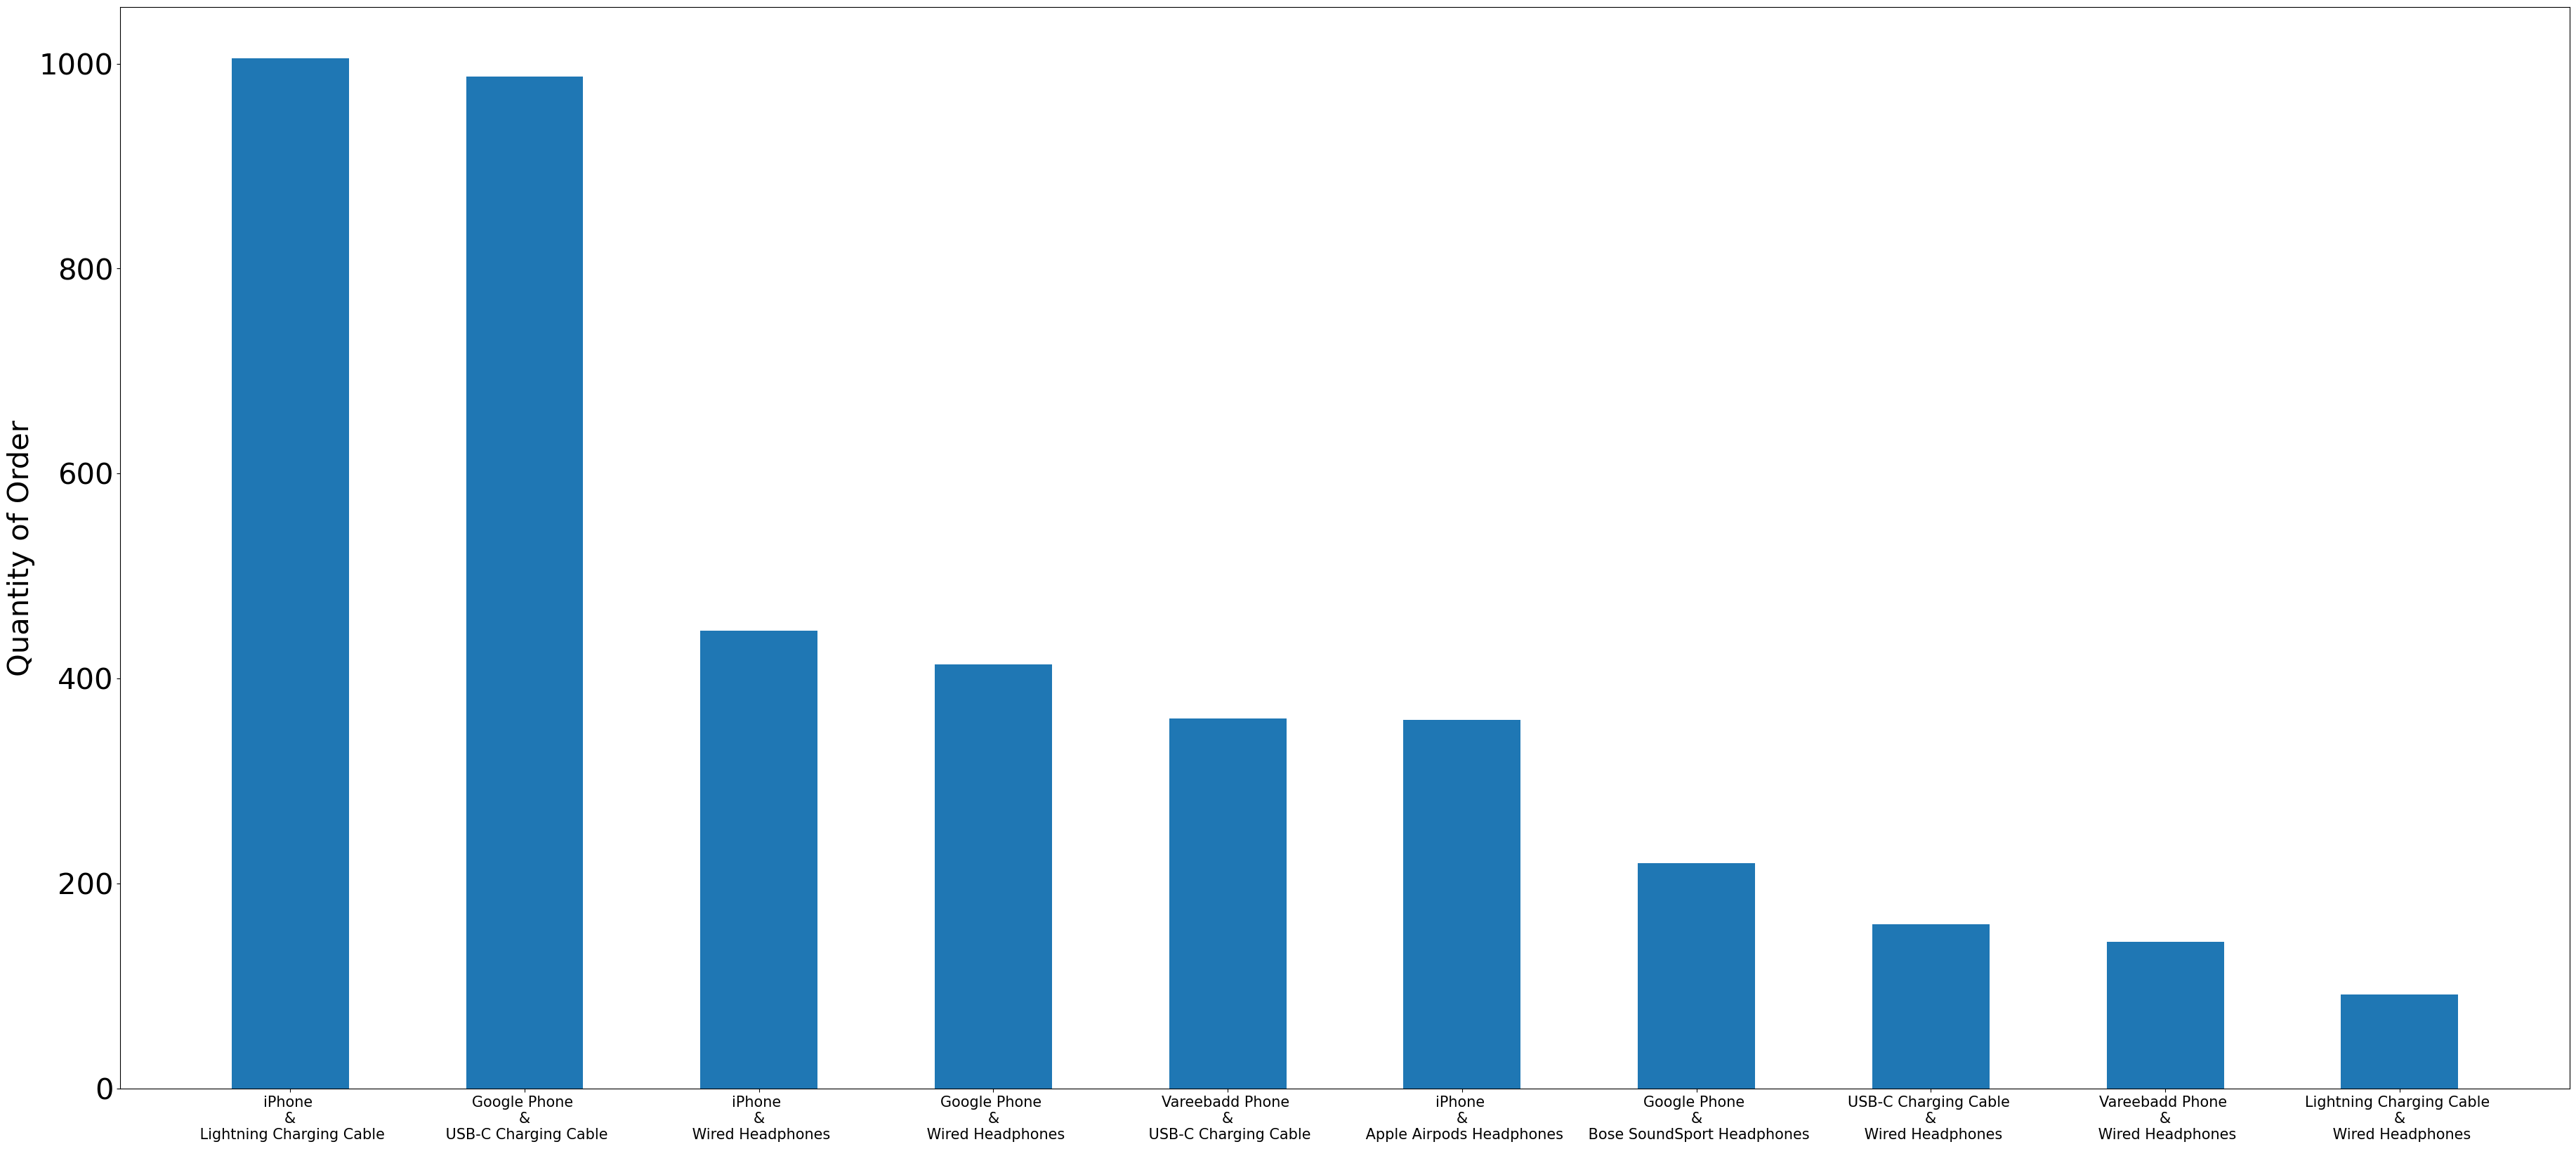

In [315]:
#make empty list as container for graphic data
products = list()
sold = list()

#insert data to list
for key, value in count.most_common(10):
    products.append(' \n&\n '.join(key)) #This data is tuple need to be convert join
    sold.append(value)  

plt.figure(figsize=(45,20))
plt.bar(products,sold, width = 0.5)
plt.xticks(size=15)
plt.yticks(size=30)
plt.ylabel('Quantity of Order', size = 30)


##### Question 5 : What product sold the most? Why ?

In [316]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [321]:
all_data.groupby('Product').sum().sort_values(by='Quantity Ordered', ascending=False)

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,,
AAA Batteries (4-pack),4.764959e+09,31017.0,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),4.744174e+09,27635.0,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,5.049538e+09,23975.0,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,4.994091e+09,23217.0,323787.10,153092,347094.15,312529,634442
Wired Headphones,4.350952e+09,20557.0,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,3.579120e+09,15661.0,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,3.071496e+09,13457.0,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,1.724224e+09,7550.0,1125974.93,52558,1132424.50,107540,219948
iPhone,1.571390e+09,6849.0,4789400.00,47941,4794300.00,98657,201688


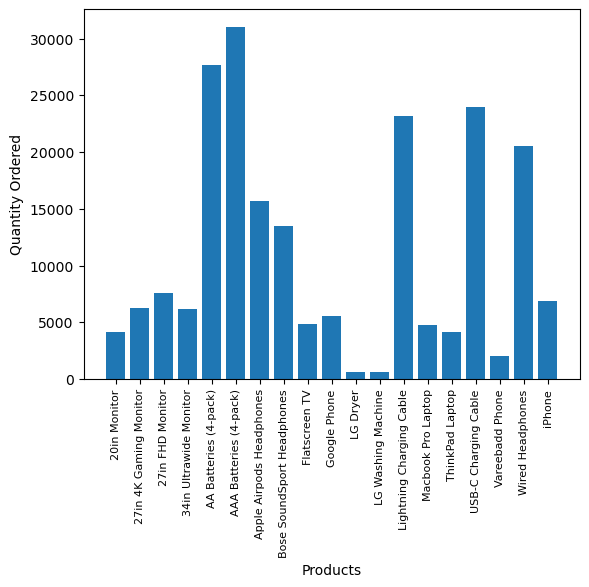

In [327]:
x = [hour for hour, x in all_data.groupby('Product')]
y = all_data.groupby('Product').sum()['Quantity Ordered']

plt.bar(x,y)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation='vertical', size=8)

plt.show()

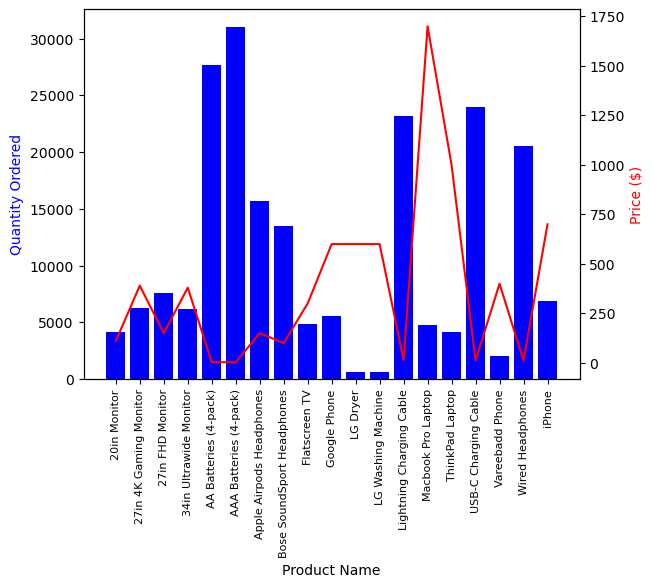

In [379]:
prices= all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x,y, color = 'blue')
ax2.plot(x,prices, 'red')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'blue')
ax2.set_ylabel('Price ($)', color ='red')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()